# Uppgift 1 - uppvärmning covid-19 data

## a)

In [1]:
import pandas as pd
path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
veckodata_riket = pd.read_excel(path, sheet_name= "Veckodata Riket")



## b)

In [2]:
veckodata_riket.insert( 0, 'Vecka',  veckodata_riket["år"].astype(str) + "v" + veckodata_riket["veckonummer"].astype(str)) #Inserts new column as first column
veckodata_riket = veckodata_riket.drop(['veckonummer', 'år'], axis = 1) #Deletes veckonummer
veckodata_riket

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021v37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021v38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021v39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021v40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


## c)

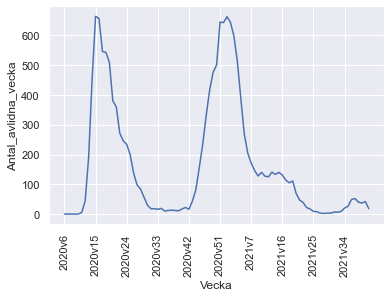

In [31]:
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt
import numpy as np

sns.set()

def newplot(): # Setting setup as functions as reccurent in exercice
    fig, ax = plt.subplots()
    plt.xticks(np.arange(stop = len(veckodata_riket["Vecka"])), veckodata_riket["Vecka"], rotation ='vertical')
    plt.locator_params(axis="x", nbins=10) # Limits the xticks to 10 shown

def savefigure(graph):
    fig = graph.get_figure()
    #fig.savefig(f"Data/img/{ax.ylabels}.png")  Jag har inte hunnit fixa så att grapherna sparas med olika namn...
    fig.savefig(f"Data/img/output.png")

newplot()
graph_1 = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal_avlidna_vecka")
savefigure(graph_1)






In [4]:
fig_1 = px.line(veckodata_riket, x = "Vecka", y = "Antal_avlidna_vecka", title = "Weekly casualties")
fig_1.show()

## d)

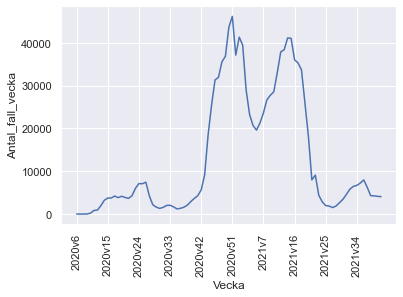

In [19]:
newplot()
graph_2 = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal_fall_vecka")
savefigure(graph_2)



In [6]:
fig_2 = px.line(veckodata_riket, x = "Vecka", y = "Antal_fall_vecka", title = "Weekly covid positives")
fig_2.show()


## e)

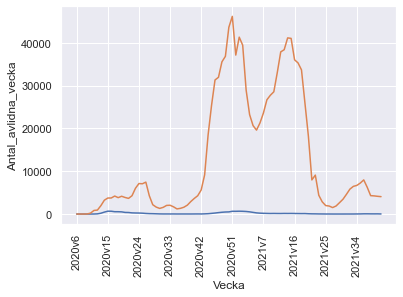

In [7]:
newplot()
graph_1 = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal_avlidna_vecka")
graph_2 = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Antal_fall_vecka")



In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=veckodata_riket["Vecka"], y=veckodata_riket["Antal_avlidna_vecka"], name="Antal döda per vecka"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=veckodata_riket["Vecka"], y=veckodata_riket["Antal_fall_vecka"], name="Antal fall per vecka"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Fall och avlidna per vecka"
)

# Set x-axis title
fig.update_xaxes(title_text="tidspunkt")

fig.update_yaxes(title_text="<b>Avlidna</b> per vecka", secondary_y=False)
fig.update_yaxes(title_text="<b>Fall</b> per vecka", secondary_y=True)

fig.show()

## f)

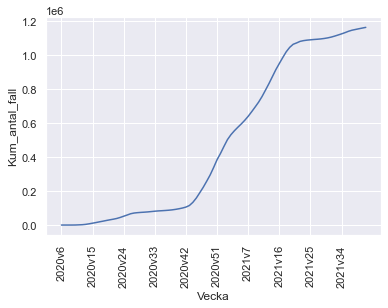

In [9]:
newplot()
graph_3 = sns.lineplot(data = veckodata_riket, x = "Vecka", y = "Kum_antal_fall")

In [10]:
fig_3 = px.line(veckodata_riket, x = "Vecka", y = "Kum_antal_fall", title = "Weekly covid positives")
fig_3.show()


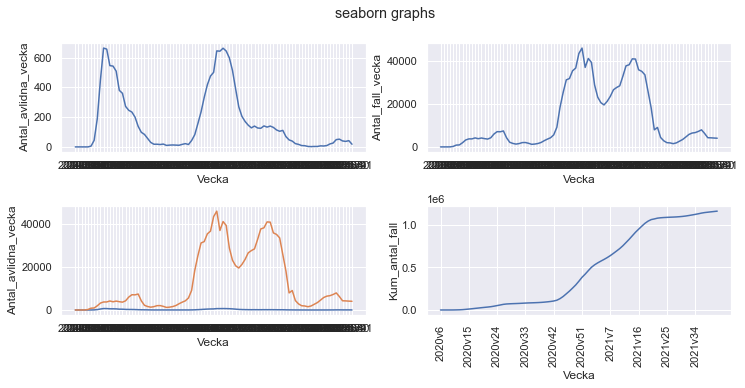

In [11]:
fig, axes = plt.subplots(2,2, figsize=(12,5))
plt.subplots_adjust(hspace = 0.5)
x_ticks = plt.xticks(np.arange(stop = len(veckodata_riket["Vecka"])), veckodata_riket["Vecka"], rotation ='vertical')
x_loc = plt.locator_params(axis="x", nbins=10)

fig.suptitle('seaborn graphs')
graphs = [
    sns.lineplot(ax = axes[0, 0], data = veckodata_riket, x = "Vecka", y = "Antal_avlidna_vecka"),
    sns.lineplot(ax = axes[0, 1], data = veckodata_riket, x = "Vecka", y = "Antal_fall_vecka"),
    sns.lineplot(ax = axes[1, 0], data = veckodata_riket, x = "Vecka", y = "Antal_avlidna_vecka"),
    sns.lineplot(ax = axes[1, 0], data = veckodata_riket, x = "Vecka", y = "Antal_fall_vecka"),
    sns.lineplot(ax = axes[1, 1], data = veckodata_riket, x = "Vecka", y = "Kum_antal_fall"),
]









In [ ]:
graphs = [graph_1, graph_2, graph_3, graph]

fig = sns_plot.get_figure()
fig.savefig("output.png")